In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [2]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#connection to mongodb database
import pymongo
from pymongo import MongoClient

In [4]:
client = pymongo.MongoClient('localhost')
li = client.spring.credit

In [5]:
cursor = li.find()


In [6]:
entries = list(cursor)

In [7]:
data = pd.DataFrame(entries)

In [8]:
data.head()

,_id,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,61f2fef8f8645dc794e2cb81,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
1,61f2fef8f8645dc794e2cb82,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
2,61f2fef8f8645dc794e2cb83,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
3,61f2fef8f8645dc794e2cb84,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
4,61f2fef8f8645dc794e2cb85,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0


In [9]:
# drop unwanted column
data.drop(['_id'], axis=1, inplace=True)

In [10]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
1,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
2,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
3,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
4,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0


In [11]:
#shape of the data
data.shape

(690, 16)

In [12]:
data.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [13]:
# check for missing values
data.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [14]:
# filter the numerical variables
data_num = data.select_dtypes(include=np.number)

# print the first three rows of the data
data_num.head(3)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
1,15687688,0,21.67,11.50,1,5,3,0.00,1,1,11,1,2,0,1,1
2,15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1


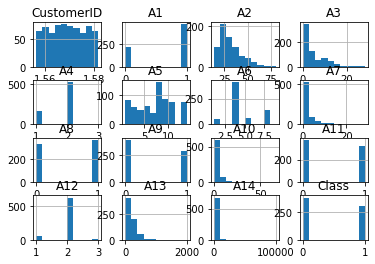

In [15]:
# create a histogram for numerical variables
data_num.hist()
# diaplay the plot
plt.show()

<AxesSubplot:>

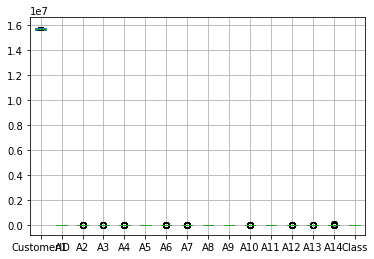

In [16]:
# create a boxplot for numeric variables
data_num.boxplot()

In [17]:
# X 
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
1,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
2,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
3,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
4,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
686,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1
687,15633608,0,22.92,11.585,2,13,4,0.040,1,0,0,0,2,80,1350,1
688,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1


In [18]:
# Shape of the data:
data.shape

(690, 16)

In [19]:
# Info of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


### 3. Defining X variables

For Self Organizing Maps, only require X variables. In this case, we do not require the customerID as it is a unique variable and neither the Y (target variable) hence not using either. 

Though, the target variable (Y) can be used to understand if the output is matching with input or not. 

In [20]:
# Defining X variables for the input of SOM

X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

In [21]:
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
1,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
2,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
3,0.0,15.83,0.585,2.0,8.0,8.0,1.500,1.0,1.0,2.0,0.0,2.0,100.0
4,1.0,17.42,6.500,2.0,3.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0
686,1.0,48.58,0.205,1.0,4.0,4.0,0.250,1.0,1.0,11.0,0.0,2.0,380.0
687,0.0,22.92,11.585,2.0,13.0,4.0,0.040,1.0,0.0,0.0,0.0,2.0,80.0
688,1.0,24.42,12.335,2.0,11.0,8.0,1.585,1.0,0.0,0.0,1.0,2.0,120.0


In [22]:
# Y variables:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,0
...,...
685,1
686,1
687,1
688,1


### 4. Normalization

Scaling the X variables:

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [24]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
1,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
2,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
3,0.0,0.031278,0.020893,0.5,0.538462,0.875,0.052632,1.0,1.0,0.029851,0.0,0.5,0.05
4,1.0,0.055188,0.232143,0.5,0.153846,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06
686,1.0,0.523759,0.007321,0.0,0.230769,0.375,0.008772,1.0,1.0,0.164179,0.0,0.5,0.19
687,0.0,0.137895,0.413750,0.5,0.923077,0.375,0.001404,1.0,0.0,0.000000,0.0,0.5,0.04
688,1.0,0.160451,0.440536,0.5,0.769231,0.875,0.055614,1.0,0.0,0.000000,1.0,0.5,0.06


### 5. Defining the Hyper Parameters

In [25]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

With x = 10 and y = 10 as the respective number of rows and number of columns (dimensions) there will be 10* 10 meaning 100 segments.

input_len are the number of features of X 

In [26]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

In [27]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.16694634, 0.29565891, 0.30259933, 0.31683056, 0.35208479,
        0.34669964, 0.29929478, 0.25282882, 0.33192984, 0.32658725],
       [0.29091589, 0.44645732, 0.68544382, 0.63255122, 0.72240944,
        0.55644425, 0.61008622, 0.49600954, 0.56799323, 0.31233619],
       [0.34949879, 0.57618707, 0.57236187, 1.        , 0.66959717,
        0.74964544, 0.49811407, 0.62893391, 0.46140154, 0.46398483],
       [0.40793231, 0.6367141 , 0.7142906 , 0.66045091, 0.63943631,
        0.52614956, 0.57996335, 0.53220795, 0.58108728, 0.28215729],
       [0.42034106, 0.57750708, 0.590165  , 0.48519537, 0.56260201,
        0.57222646, 0.53930669, 0.55602744, 0.65068872, 0.27780343],
       [0.34236179, 0.72724472, 0.71224617, 0.66782383, 0.70115119,
        0.85302048, 0.53894119, 0.64331   , 0.64741745, 0.39866026],
       [0.36872074, 0.70491665, 0.71799488, 0.62430156, 0.77761407,
        0.97119098, 0.75141982, 0.56282514, 0.69292062, 0.36515918],
       [0.33050185, 0.48230454, 0.5664196

Pcolor() is used to color all MIDs and the window is the bone().

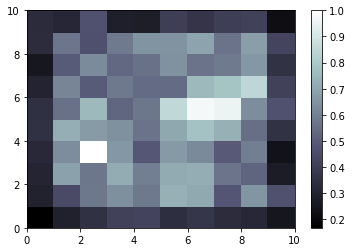

In [28]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

If the outlier depicted in the heatmap is aligned or not with the actual fraud customers then cross check via:

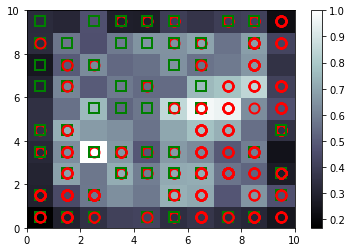

In [29]:
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

- The markers used to distinguish frauds are:
    - Red Circular are Class 0 as fraud customers
    - Green Square are Class 1 as not fraud customers
- i is the index and x is the vector of each value and for each x first get the winning node
- The co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
- s is a square and marker face color is the inside color of the marker

There are some customers who don't have mapping above so those wouldn't be part of the segments.. 

In [30]:
mappings = som.win_map(X)

In [31]:
mappings

defaultdict(list,
            {(9,
              8): [array([0.        , 0.23804511, 0.0625    , 0.        , 0.23076923,
                     0.375     , 0.04385965, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.14      ]), array([0.        , 0.10030075, 0.375     , 0.        , 1.        ,
                     0.875     , 0.        , 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.077     ]), array([0.        , 0.42857143, 0.0625    , 0.        , 0.53846154,
                     0.375     , 0.        , 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.075     ]), array([0.        , 0.14781955, 0.41071429, 0.        , 0.23076923,
                     0.875     , 0.10526316, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.01      ]), array([0.        , 0.31699248, 0.04464286, 0.        , 0.15384615,
                     0.875     , 0.01754386, 0.    

In [32]:
mappings.keys()

dict_keys([(9, 8), (6, 6), (1, 8), (3, 5), (7, 2), (4, 5), (1, 1), (6, 4), (8, 0), (6, 8), (5, 8), (5, 9), (2, 1), (6, 2), (3, 9), (3, 6), (4, 6), (8, 9), (5, 2), (1, 4), (9, 6), (1, 3), (4, 9), (9, 5), (6, 7), (4, 3), (0, 1), (5, 3), (9, 4), (6, 0), (9, 2), (7, 0), (8, 6), (0, 7), (9, 0), (8, 7), (6, 1), (4, 0), (0, 6), (8, 8), (0, 3), (6, 5), (2, 3), (1, 2), (1, 6), (1, 7), (7, 5), (1, 0), (9, 1), (7, 4), (2, 7), (7, 9), (3, 8), (5, 7), (0, 0), (5, 1), (8, 1), (8, 5), (4, 8), (0, 8), (8, 3), (9, 9), (5, 0), (3, 3), (0, 4), (6, 3), (2, 0), (3, 2), (0, 9), (5, 5), (2, 5), (4, 2), (2, 9), (7, 6), (7, 3), (8, 2)])

(9, 08) means that the 9th row and 8th column ; (9, 0) implies 9th row and 0th column.

In [33]:
# out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it 
len(mappings.keys())

76

Out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it.

Below are the inputs for the key: 9,8: 

In [34]:
mappings[(9,8)]

[array([0.        , 0.23804511, 0.0625    , 0.        , 0.23076923,
        0.375     , 0.04385965, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.14      ]),
 array([0.        , 0.10030075, 0.375     , 0.        , 1.        ,
        0.875     , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.077     ]),
 array([0.        , 0.42857143, 0.0625    , 0.        , 0.53846154,
        0.375     , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.075     ]),
 array([0.        , 0.14781955, 0.41071429, 0.        , 0.23076923,
        0.875     , 0.10526316, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.01      ]),
 array([0.        , 0.31699248, 0.04464286, 0.        , 0.15384615,
        0.875     , 0.01754386, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.08      ]),
 array([0.        , 0.29323308, 0.08928571, 0.        , 0.53846154,
        0.375     , 0.

Concatenating the fraud winning nodes by seeing the graph:

In [35]:
# Taking some of the red circular from the heat map and mapping as Frauds:

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

In [36]:
frauds

array([[1.        , 0.64165414, 1.        , 0.        , 0.53846154,
        0.375     , 1.        , 1.        , 1.        , 0.59701493,
        0.        , 0.5       , 0.        ],
       [0.        , 0.08150376, 0.02089286, 0.        , 0.38461538,
        0.375     , 0.02052632, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.08      ],
       [0.        , 0.54255639, 0.48517857, 0.5       , 0.23076923,
        0.875     , 0.29824561, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.        ],
       [0.        , 0.22300752, 0.12642857, 0.5       , 0.15384615,
        0.5       , 0.01754386, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.0855    ],
       [0.        , 0.17037594, 0.09071429, 0.        , 0.38461538,
        0.375     , 0.00877193, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.185     ],
       [0.        , 0.65157895, 0.01196429, 0.5       , 0.15384615,
        0.5       , 0.03508

In [37]:
frauds.shape

(11, 13)

In [38]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [39]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0
1,0.0,19.17,0.585,1.0,6.0,4.0,0.585,1.0,0.0,0.0,1.0,2.0,160.0
2,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0
3,0.0,28.58,3.540,2.0,3.0,5.0,0.500,1.0,0.0,0.0,1.0,2.0,171.0
4,0.0,25.08,2.540,1.0,6.0,4.0,0.250,1.0,0.0,0.0,1.0,2.0,370.0
5,0.0,57.08,0.335,2.0,3.0,5.0,1.000,1.0,0.0,0.0,1.0,2.0,252.0
6,0.0,49.00,1.500,2.0,5.0,3.0,0.000,1.0,0.0,0.0,1.0,2.0,100.0
7,0.0,17.58,9.000,2.0,6.0,4.0,1.375,1.0,0.0,0.0,1.0,2.0,0.0
8,0.0,31.57,3.500,2.0,2.0,4.0,3.000,1.0,0.0,0.0,1.0,2.0,300.0
9,0.0,41.33,1.000,2.0,3.0,5.0,2.250,1.0,0.0,0.0,1.0,2.0,0.0


In [40]:
# serializing our model to a file called model.pkl
import pickle
pickle.dump(som, open("som.pkl","wb"))